## Project Overview
This project aims to develop a supervised machine learning model for **Optical Recognition of Handwritten Digits**. The dataset is sourced from the **UCI Machine Learning Repository**, where handwritten digits from 43 different individuals were collected. The dataset consists of **64 features**, representing an 8x8 pixel image of a handwritten digit (0-9). However, the dataset is relatively small, which may impact model generalization. The goal is to classify these digits accurately using machine learning models.

## Result Summary
This project used the Optical Recognition of Handwritten Digits dataset to train SVM, KNN, and Random Forest models.
- **SVM** performed the best, achieving an accuracy of approximately **99%**.
- **Misclassification analysis** revealed that certain digits, such as `3` and `8`, were more challenging to distinguish.
- **Hyperparameter tuning** identified `C=10, gamma='scale'` as the optimal parameters for the SVM model.
- Future improvements could include using **CNN (Convolutional Neural Networks)** to enhance classification performance or applying **data augmentation** to improve model generalization.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 1: Load Data
**Fetching the Optical Recognition of Handwritten Digits dataset from UCI ML Repository**

In [16]:
from ucimlrepo import fetch_ucirepo 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

## Step 2: Data Exploration
**Checking dataset shape and target distribution**

In [4]:
print("Dataset Shape:", X.shape)
print("Target Distribution:")
print(y.value_counts())

Dataset Shape: (5620, 64)
Target Distribution:
class
3        572
1        571
4        568
7        566
9        562
6        558
5        558
2        557
0        554
8        554
Name: count, dtype: int64


## Step 3: Data Visualization - Sample Digits
**Displaying a few sample images from the dataset**

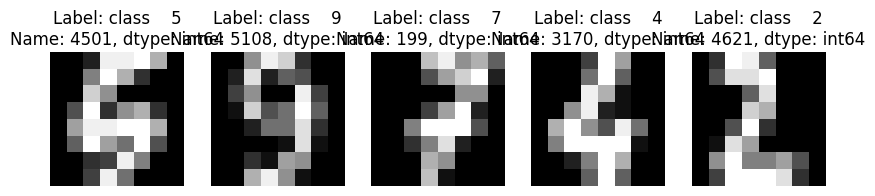

Missing values in X: 0
Missing values in y: 0


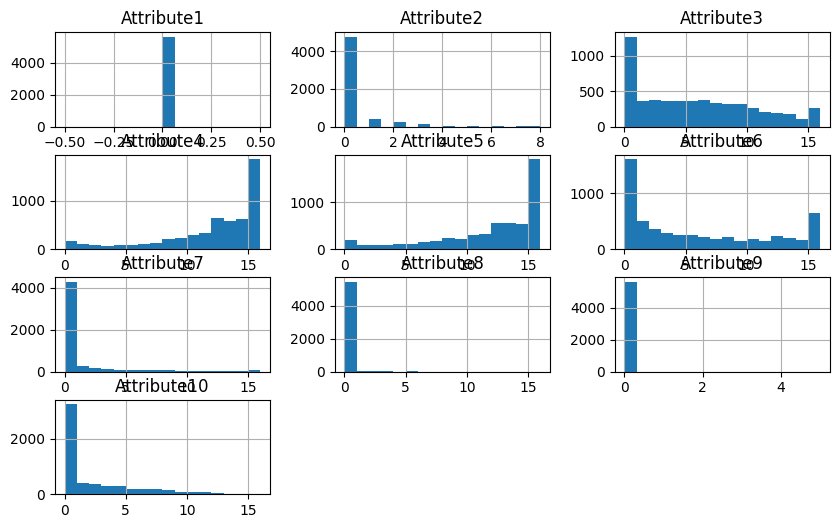

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
sample_indices = np.random.choice(len(X), 5, replace=False)
for i, idx in enumerate(sample_indices):
    img = X.iloc[idx].to_numpy().reshape(8, 8)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {y.iloc[idx]}")
    axes[i].axis('off')
plt.show()

print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum().sum())

X.iloc[:, :10].hist(figsize=(10, 6), bins=16)
plt.show()


## Step 4: Data Preprocessing
**Scaling the feature values to range [0,1] and splitting into training and test sets**

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Step 5: Train Models
**Training three models: SVM, KNN, and Random Forest**

In [8]:
models = {
    "SVM": SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

C:\Users\yuhao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.9920
KNN Accuracy: 0.9884


C:\Users\yuhao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yuhao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9867


## Step 6: Model Evaluation - Confusion Matrix for Best Model (SVM)
**Displaying confusion matrix for SVM model**

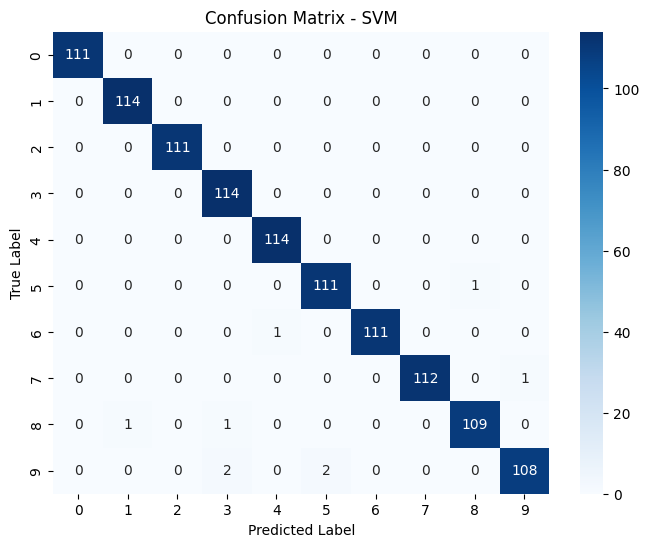

Classification Report - SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.99      1.00      1.00       114
           2       1.00      1.00      1.00       111
           3       0.97      1.00      0.99       114
           4       0.99      1.00      1.00       114
           5       0.98      0.99      0.99       112
           6       1.00      0.99      1.00       112
           7       1.00      0.99      1.00       113
           8       0.99      0.98      0.99       111
           9       0.99      0.96      0.98       112

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



In [9]:
y_pred_svm = models["SVM"].predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

## Step 7: Misclassified Samples Visualization
**Visualizing some misclassified samples to understand errors**

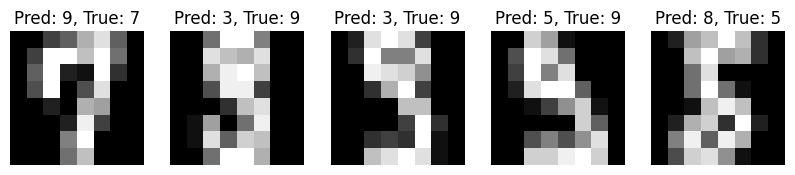

In [10]:
y_test_np = np.array(y_test).ravel()
y_pred_svm_np = np.array(y_pred_svm)
misclassified_idx = np.where(y_test_np != y_pred_svm_np)[0]

fig, axes = plt.subplots(1, min(5, len(misclassified_idx)), figsize=(10, 3))
for i, idx in enumerate(misclassified_idx[:5]):
    img = X_test[idx].reshape(8, 8)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Pred: {y_pred_svm_np[idx]}, True: {y_test_np[idx]}")
    axes[i].axis('off')
plt.show()

## Step 8: Hyperparameter Tuning for SVM
**Using GridSearchCV to find the best hyperparameters for SVM**

In [11]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


C:\Users\yuhao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
